# TEDS End-to-End Simulation for TANGO-Carbon

### This notebook includes a first processing chain for TANGO Carbon. The chain is setup for consistent processing that is outlined in the following diagram:  

![title](./tango_e2es_Carbon_chain_PAM.png)

## Reference
+ ATBD
+ User manual

## Initialization

#### 1. Setup the working environment

In [1]:
import sys
import os
import yaml
# define  path to search for module
sys.path.append("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/")
os.chdir("/home/jochen/TANGO_E2ES/EndtoEndProject/end_to_end/examples/exp1.0_full_chain/")

#### 2. import TEDS modules

In [2]:
from teds.gm import geometry_module
from teds.sgm import geoscene_generation
from teds.sgm import Carbon_radiation_scene_generation
#from teds.siml1b import simplified_instrument_model_and_l1b_processor
#from teds.l1l2 import level1b_to_level2_processor
from teds.pam import pam_co2

#### 3. Select the target scene named after the targeted power plant 
Currently, four reference scenes can be used: (1) Matimba, (2) Jenschwalde, (3) Belchatow, (4) Lipetsk.


In [3]:
#station_name = 'Matimba'
station_name = 'Jaenschwalde'
#station_name = 'Belchatow'
#station_name = 'Lipetsk'

In [4]:
flag_gm     = False
flag_sgmgps = False
flag_sgmrad = False

## Geometry Model

#### 1. runing the module

In [5]:
if(flag_gm):
    #configureation file
    gm_config= yaml.safe_load(open('./settings/gm_config_stations.yaml'))
    #select the list for the selected target
    gm_config = gm_config[station_name]
    geometry_module(gm_config)

#### 2. Visualization of the GM output

For plt_options use 'pixel' to show the geolocation of the pixel center points, and 'geometry' to show solar zenith angle, viewing zenith angle, solar azimuth angle, and viewing azimuth angle.

In [6]:
if(flag_gm):
    filen = gm_config['io_files']['output_gm']
    plt_option = 'geoloc'
    pam_co2.pam_gm_Tango_Carbon(filen, station_name, plt_option)

## Scene Generatior Module (SGM): Geo-Physical Scene

### 1. Run the module

In [7]:
if(flag_sgmgps):
    sgmgps_config= yaml.safe_load(open('./settings/geosgm_config_stations.yaml'))
    #select the list for the selected target
    sgmgps_config['io_files'] = sgmgps_config[station_name]['io_files']
    sgmgps_config['profile'] = 'orbit'
    geoscene_generation(sgmgps_config)

### 2. Vizualization of SGM-GPS output

plt_options is used to configure the output. 
* The input 'albedo Bxx' specifies the spectral band to be plotted. Here, xx is the band specification. Only bands can be plotted that are given in the input data (e.g. B08 is not available but the more norrow band B08A can be plotted). 
* The input 'Xxx' specifies the trace gas. Here, xx specifies the gas and can be CO2, NO, NO2, CH4, or H2O

In [8]:
if(flag_sgmgps):
    filen = sgmgps_config['io_files']['output_geo']
    plt_option = 'XCO2'
#    plt_option = 'albedo B11'
    pam_co2.pam_sgm_gps(filen, station_name, plt_option)

## Scene Generatior Module (SGM): Radiation Scene

### 1. Execute SGM Radiation scene

In [9]:
if(flag_sgmrad):
    sgmrad_config= yaml.safe_load(open('./settings/radsgm_config_stations.yaml'))
    sgmrad_config['io_files'] = sgmrad_config[station_name]['io_files']
    sgmrad_config['profile'] = 'orbit'
    Carbon_radiation_scene_generation(sgmrad_config)

IndexError: lon not found in /

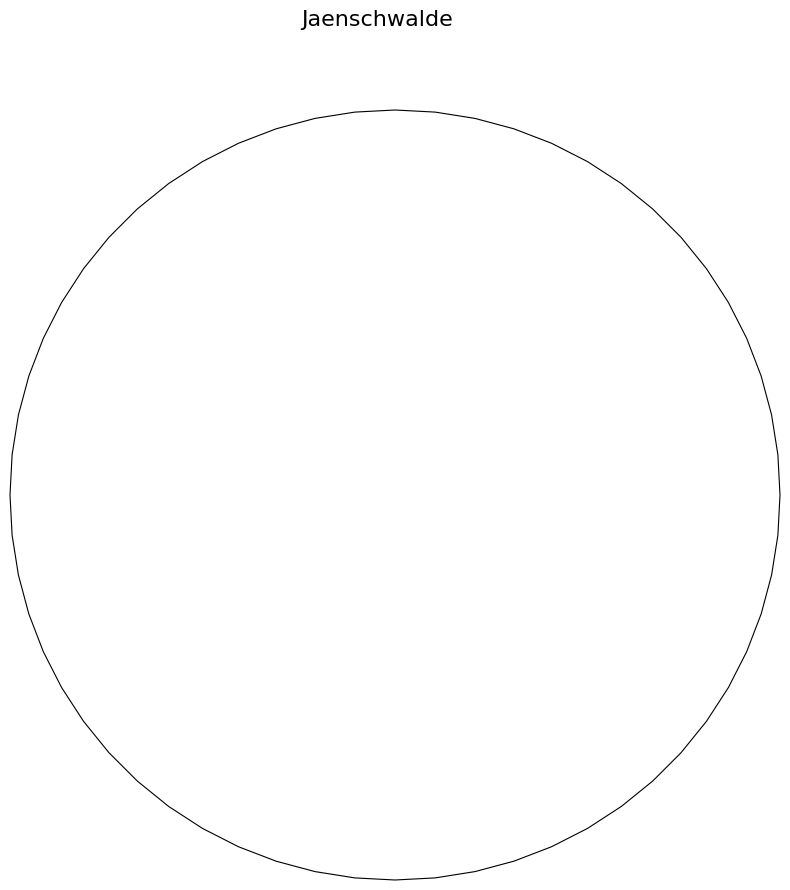

In [10]:
sgmrad_config= yaml.safe_load(open('./settings/radsgm_config_stations.yaml'))
sgmrad_config['io_files'] = sgmrad_config[station_name]['io_files']

filen_rad = sgmrad_config['io_files']['output_rad']
filen_rad = sgmrad_config['io_files']['output_rad']
plt_option = 'rad_map'
wavel = 1600.0
pam_co2.pam_sgm_rad(filen, station_name, plt_option, wavel)